# setup

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import accuracy_score,log_loss,mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs,load_iris
from sklearn.model_selection import train_test_split
from IPython.display import HTML
from tqdm import tqdm_notebook
from numpy.linalg import norm


In [53]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red",'yellow','green'])

In [54]:
np.random.seed(0)

 # Generating data and preprocessing

In [55]:
# data,labels=make_blobs(1000,2,3,random_state=0)
# print(data.shape,labels.shape)
iris=load_iris()
data = iris.data[:, :2]  # take only the first two features
labels = iris.target

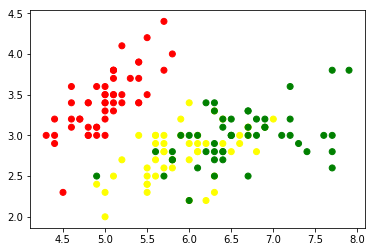

In [56]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [57]:
# Spliting data into train and test set
X_train,X_val,Y_train,Y_val=train_test_split(data,labels,stratify=labels,random_state=0)
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

(112, 2) (38, 2) (112,) (38,)


In [58]:
#Encoding Y_train in onehot encoder form
enc=OneHotEncoder()

In [59]:
Y_train_oh=enc.fit_transform(np.expand_dims(Y_train,axis=1)).toarray()
print(Y_train_oh,Y_train_oh.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0.

In [143]:
class FFMI:
    def __init__(self,num_hidden=2,init_method="xavier",activation_function='sigmoid',leaky_slope=0.1):
        self.params = {}
        self.layer_sizes=[2,num_hidden,3]
        self.num_layers=2
        self.activation_function=activation_function
        self.leaky_slope=leaky_slope
        np.random.seed(0)
        
        if init_method == 'random':
            for i in range(1,self.num_layers+1):
                self.params["W"+str(i)] = np.random.randn(self.layer_sizes[i-1],self.layer_sizes[i])
                self.params["B"+str(i)] = np.random.randn(1,self.layer_sizes[i])
                
        elif init_method == 'xavier':
            for i in range(1,self.num_layers+1):
                self.params["W"+str(i)] = np.random.randn(self.layer_sizes[i-1],self.layer_sizes[i])*np.sqrt(1/self.layer_sizes[i-1])
                self.params["B"+str(i)] = np.random.randn(1,self.layer_sizes[i])
                
        elif init_method == 'he':
            for i in range(1,self.num_layers+1):
                self.params["W"+str(i)] = np.random.randn(self.layer_sizes[i-1],self.layer_sizes[i])*np.sqrt(2/self.layer_sizes[i-1])
                self.params["B"+str(i)] = np.random.randn(1,self.layer_sizes[i])    
                
        elif init_method == 'random':
            for i in range(1,self.num_layers+1):
                self.params["W"+str(i)] = np.zeros((self.layer_sizes[i-1],self.layer_sizes[i]))
                self.params["B"+str(i)] = np.zeros((1,self.layer_sizes[i]))
                
        self.gradients= {}
        self.update_params = {}
        self.prev_update_params = {}
        for i in range(1,self.num_layers+1):
            self.update_params["v_w"+str(i)]=0
            self.update_params["v_b"+str(i)]=0
            self.update_params["m_w"+str(i)]=0
            self.update_params["m_b"+str(i)]=0
            self.prev_update_params["v_w"+str(i)]=0
            self.prev_update_params["v_b"+str(i)]=0
            
            
    def forward_activation(self,X):
        if self.activation_function=='sigmoid':
            return 1.0/(1.0-np.exp(-X))
        elif self.activation_function=='tanh':
            return np.tanh(X)
        elif self.activation_function=='relu':
            return np.maximum(0,X)
        elif self.activation_function=='leaky_relu':
            return np.maximum(self.leaky_slope*X,X)
        
    def grad_activation(self,X):
        if self.activation_function=='sigmoid':
            return X*(1-X)
        elif self.activation_function=='tanh':
            return 1.0-np.square(X)
        elif self.activation_function=='relu':
            return 1.0*[X>0]
        elif self.activation_function=='leaky_relu':
            d=np.zeros_like(X)
            d[X<=0]=self.leaky_slope
            d[X>0]=1
            return d
        
    def get_accuracy(self):
        Y_pred_train = model.predict(X_train)
        Y_pred_train = np.argmax(Y_pred_train,1)
        Y_pred_val = model.predict(X_val)
        Y_pred_val = np.argmax(Y_pred_val,1)
        train_accuracy=accuracy_score(Y_pred_train,Y_train)
        val_accuracy=accuracy_score(Y_pred_val,Y_val)
        return train_accuracy,val_accuracy
    
    def softmax(self,X):
        exps=np.exp(X)
        return exps/np.sum(exps,axis=1).reshape(-1,1)

    def forward_pass(self,X,params=None):
        if params is None:
            params=self.params
        self.A1=np.matmul(X,params["W1"]) + params["B1"] #(N,2)*(2,2) -> (N,2)
        self.H1=self.forward_activation(self.A1) #(N,2)
        self.A2=np.matmul(self.H1,params["W2"]) + params["B2"] #(N,2) * (2,3) ->(n,3)
        self.H2=self.softmax(self.A2)
        return self.H2
    
    def grad(self,X,Y,params=None):
        if params is None:
            params = self.params
        
        self.forward_pass(X,params)
        self.gradients['dA2']=self.H2-Y #(N,3)
        self.gradients['dW2']=np.matmul(self.H1.T,self.gradients['dA2']) #(2,N)*(N,3)->(2,3)
        self.gradients['dB2']=np.sum(self.gradients['dA2'],axis=0).reshape(1,-1) #(1,3)
        self.gradients['dH1']=np.matmul(self.gradients['dA2'],params['W2'].T)#(N,3)*(3,2)->(N,3)
        self.gradients['dA1']=np.multiply(self.gradients['dH1'],self.grad_activation(self.H1))#(N,2)
        self.gradients['dW1']=np.matmul(X.T,self.gradients['dA1'])#(2,N)*(N,2)->(2,2)
        self.gradients['dB1']=np.sum(self.gradients['dA1'],axis=0).reshape(1,-1)#(1,2)
        
    def predict(self,X):
        y_pred=self.forward_pass(X)
        return np.array(y_pred).squeeze()
    
    def fit(self,X,Y,epoch=100,lr=0.1,lambda_val=0.8,l2_norm=False,display_loss=True):
        train_accuracies={}
        val_accuracies={}
        if display_loss:
            loss=[]
            weight_mag=[]
        for num_epoch in tqdm_notebook(range(epoch),unit='epoch'):
            self.grad(X,Y)
            m=X.shape[0]
            for i in range(1,self.num_layers+1):
                if l2_norm:
                    self.params['W'+str(i)]  -=(lr*lambda_val)/m * self.params['W'+str(i)] + lr*(self.gradients['dW'+str(i)]/m)
                else:
                    self.params['W'+str(i)] -=lr*(self.gradients['dW'+str(i)]/m)
                self.params['B'+str(i)] -=lr*(self.gradients['dB'+str(i)]/m)
            train_accuracy,val_accuracy=self.get_accuracy()
            train_accuracies[num_epoch]=train_accuracy
            val_accuracies[num_epoch]=val_accuracy
            if display_loss:
                Y_pred=self.predict(X)
                loss.append(log_loss(np.argmax(Y, axis=1), Y_pred))
#                 loss[num_epoch]=log_loss(np.argmax(Y,axis=1),Y_pred)
                weight_mag.append(norm(self.params['W1'])+norm(self.params['W1'])+norm(self.params['W1'])+norm(self.params['W1']))
                
        plt.plot(train_accuracies.values(),label="train accuracy")
        plt.plot(val_accuracies.values(),label="val accuracy")
        plt.plot(np.ones((epoch,1))*0.9)
        plt.plot(np.ones((epoch,1))*0.1)
        plt.xlabel("Epochs")
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        
        if display_loss:
            fig,ax1=plt.subplots()
            color='tab:red'
            ax1.set_xlabel('epochs')
            ax1.set_ylabel('log_loss',color=color)
            ax1.plot(loss,'-o',color=color)
            ax1.tick_params(axis='y',labelcolor=color)
            ax2=ax1.twinx()
            color='tab:blue'
            ax2.set_ylabel('weight_magnitude',color=color)
            ax2.plot(weight_mag,'-*',color=color)
            ax2.tick_params(axis='y',labelcolor=color)
            fig.tight_layout()
            plt.show()
            
        
        

In [144]:
def print_accuracy():    
    Y_pred_train = model.predict(X_train)
    Y_pred_train = np.argmax(Y_pred_train,1)
    Y_pred_val = model.predict(X_val)
    Y_pred_val = np.argmax(Y_pred_val,1)
    accuracy_train = accuracy_score(Y_pred_train, Y_train)
    accuracy_val = accuracy_score(Y_pred_val, Y_val)
    print("Training accuracy", round(accuracy_train, 4))
    print("Validation accuracy", round(accuracy_val, 4))
    
    if False:
      plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
      plt.show()

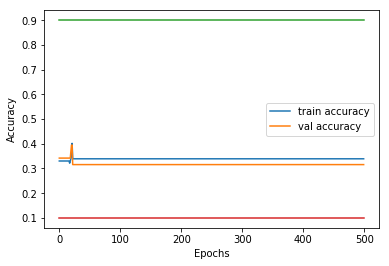

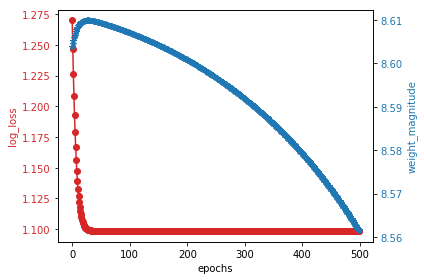

Training accuracy 0.3393
Validation accuracy 0.3158


In [145]:
model=FFMI(num_hidden=2)
model.fit(X_train,Y_train_oh,500)
print_accuracy()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow en

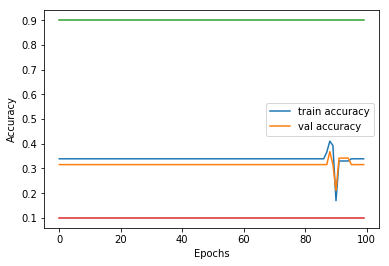

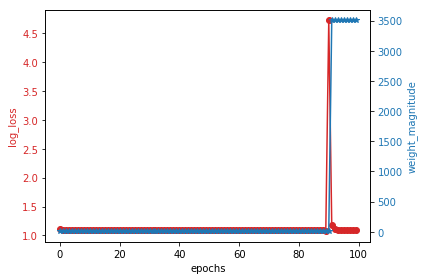

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp


Training accuracy 0.3393
Validation accuracy 0.3158


In [146]:
model=FFMI(num_hidden=2)
model.fit(X_train,Y_train_oh,100,1)
print_accuracy()

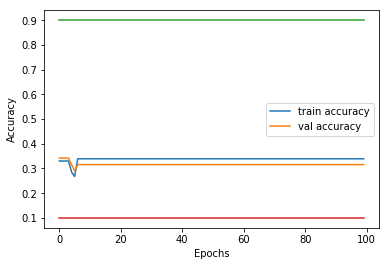

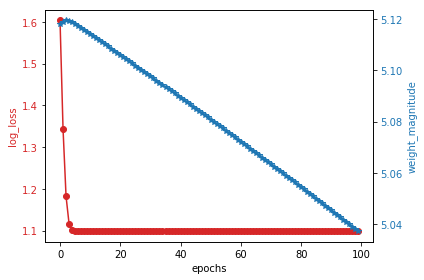

Training accuracy 0.3393
Validation accuracy 0.3158


In [147]:
model=FFMI(num_hidden=1)
model.fit(X_train,Y_train_oh,100,1)
print_accuracy()

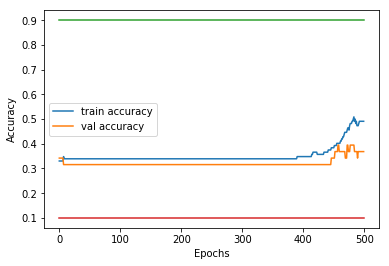

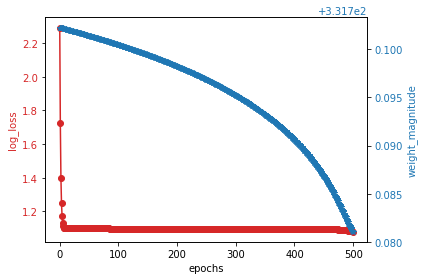

Training accuracy 0.4911
Validation accuracy 0.3684


In [148]:
model=FFMI(num_hidden=4)
model.fit(X_train,Y_train_oh,500,0.25)
print_accuracy()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow en

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow en

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow en

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow en

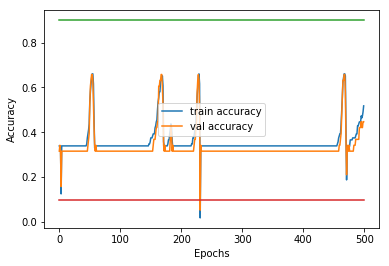

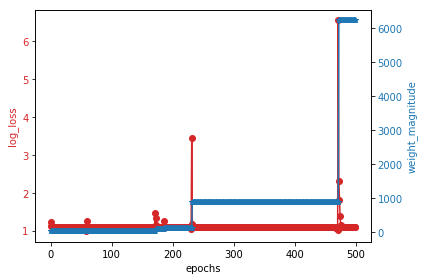

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp


Training accuracy 0.5179
Validation accuracy 0.4474


In [149]:
model=FFMI(num_hidden=8)
model.fit(X_train,Y_train_oh,500,0.5)
print_accuracy()

## In above iteration lr have been overflown

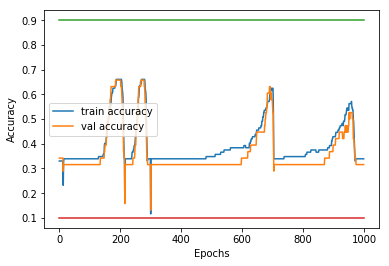

Training accuracy 0.3393
Validation accuracy 0.3158


In [150]:
#Now reducing lr
model=FFMI(num_hidden=8)
model.fit(X_train,Y_train_oh,1000,0.1,display_loss=False)
print_accuracy()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp


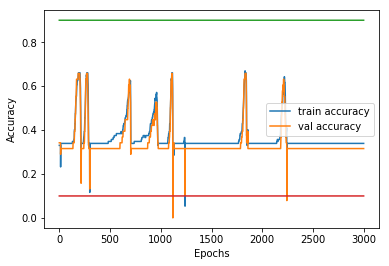

Training accuracy 0.3393
Validation accuracy 0.3158


In [151]:
model=FFMI(num_hidden=8)
model.fit(X_train,Y_train_oh,3000,0.1,display_loss=False)
print_accuracy()

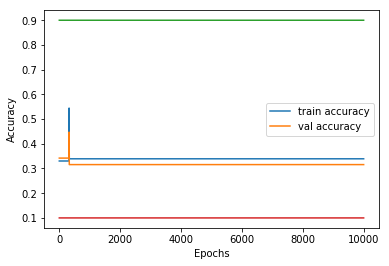

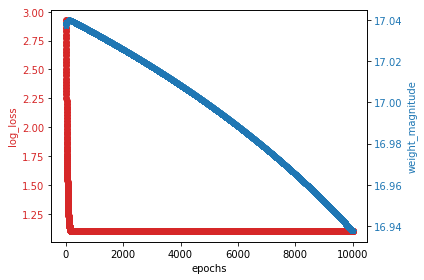

Training accuracy 0.3393
Validation accuracy 0.3158


In [152]:
model=FFMI(num_hidden=4)
model.fit(X_train,Y_train_oh,10000,0.01)
print_accuracy()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp


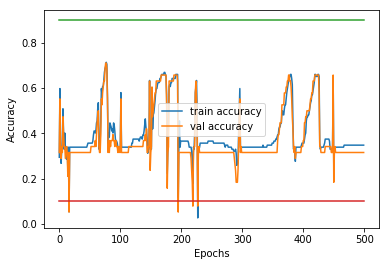

Training accuracy 0.3482
Validation accuracy 0.3158


In [153]:
model = FFMI(num_hidden=32)
model.fit(X_train, Y_train_oh, epoch=500, lr=0.2, display_loss=False)
print_accuracy()

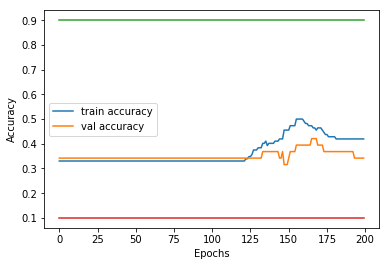

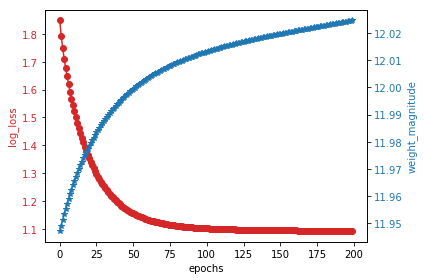

Training accuracy 0.4196
Validation accuracy 0.3421


In [154]:
model = FFMI(num_hidden=8)
model.fit(X_train, Y_train_oh, epoch=200, lr=0.01, l2_norm=False)
print_accuracy()

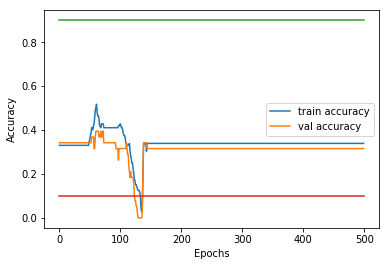

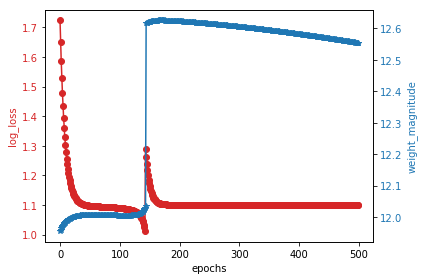

Training accuracy 0.3393
Validation accuracy 0.3158


In [155]:
#Adding l2 regularisation
model = FFMI(num_hidden=8)
model.fit(X_train,Y_train_oh, epoch=500, lr=0.025, l2_norm=True, lambda_val=0.1, display_loss=True)
print_accuracy()

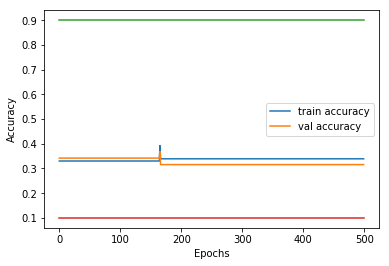

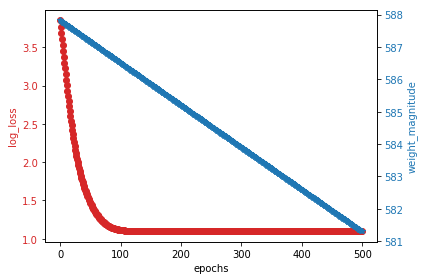

Training accuracy 0.3393
Validation accuracy 0.3158


In [156]:
model = FFMI(num_hidden=4,init_method='random')
model.fit(X_train,Y_train_oh, epoch=500, lr=0.025, l2_norm=True, lambda_val=0.1, display_loss=True)
print_accuracy()

0.01


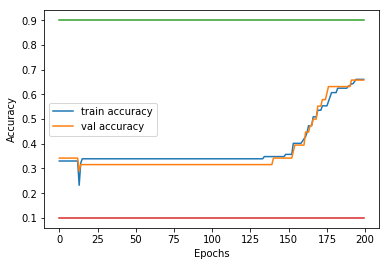

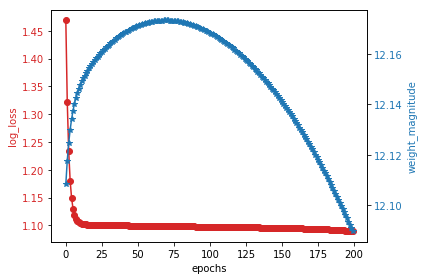

Training accuracy 0.6607
Validation accuracy 0.6579
0.05


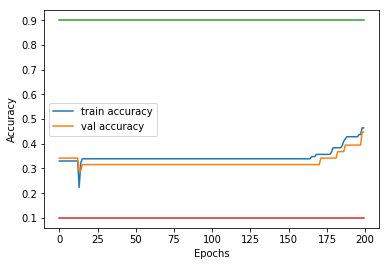

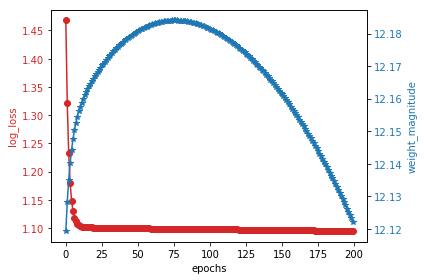

Training accuracy 0.4643
Validation accuracy 0.4474
0.1


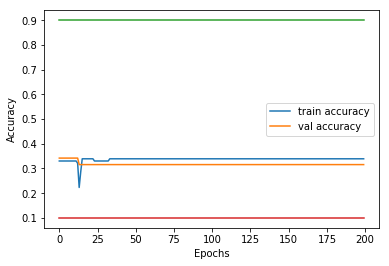

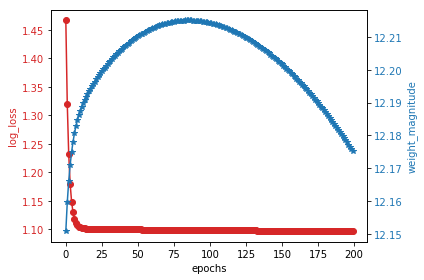

Training accuracy 0.3393
Validation accuracy 0.3158
0.15


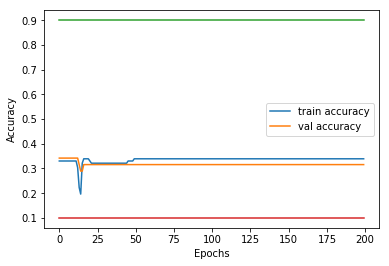

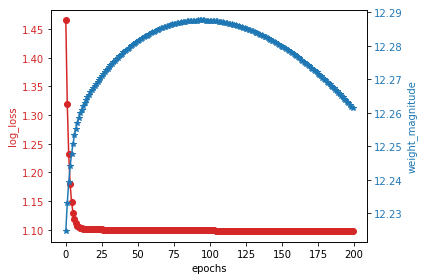

Training accuracy 0.3393
Validation accuracy 0.3158
0.18


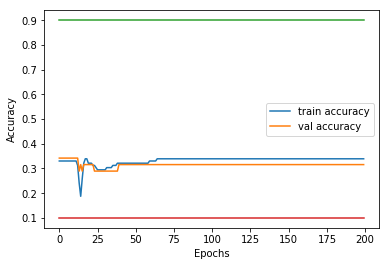

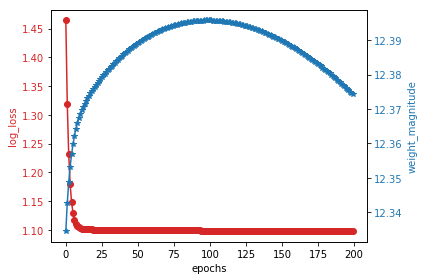

Training accuracy 0.3393
Validation accuracy 0.3158
0.2


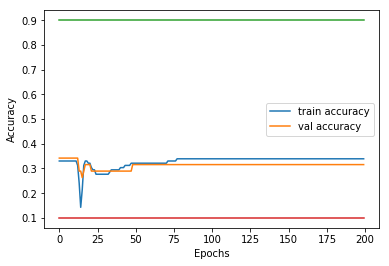

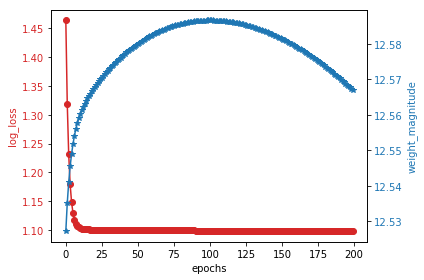

Training accuracy 0.3393
Validation accuracy 0.3158


In [164]:
for noise_fraction in [0.01, 0.05, 0.1, 0.15, 0.18, 0.2]:
    print(noise_fraction)
    X_train_noisy = X_train * (1 - noise_fraction*np.random.randn(X_train.shape[0], X_train.shape[1]))
    model = FFMI(num_hidden=8)
    model.fit(X_train_noisy, Y_train_oh, epoch=200, lr=0.1, l2_norm=False)
    print_accuracy()

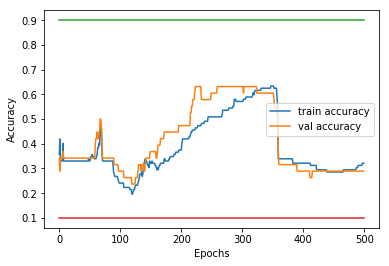

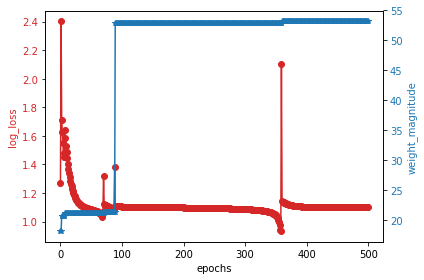

Training accuracy 0.3214
Validation accuracy 0.2895


In [168]:
model = FFMI(num_hidden=16)
model.fit(X_train, Y_train_oh,500,0.01, display_loss=True)
print_accuracy()